# ERS - Junior Data Scientist Assesment (01/03/2021)

### Gilad Amzaleg

The following notebook is written for the ERS Junior Data Scientist Role. All functions called are found at the bottom of the notebook. Please run them first before running the main body of the notebook.

**Content**

A - Exploratory Data Analysis
    1. Merging Data Sets
    2. High Level Exploration
    3. Imputation
    4. Exploration
    5. One Hot Encoding
    
B - Predictive Modelling
    1. Assesing Model
    2. Saving Model

C - Test Data Sets

D - Feature Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sklearn
import scipy
import statsmodels.api as sm
import math

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print('Pandas Version - ', pd.__version__)
print('Numpy Version - ', np.__version__)
print('Seaborn Version - ', sns.__version__)
print('Sklearn Version - ', sklearn.__version__)
print('Scipy Version - ', scipy.__version__)
print('Stats Model Version - ', sm.__version__)

Pandas Version -  1.1.5
Numpy Version -  1.18.1
Seaborn Version -  0.9.0
Sklearn Version -  0.21.3
Scipy Version -  1.4.1
Stats Model Version -  0.10.1


---------------------------------------------------------

# A - Exploratory Data Analysis

This section is for loading, exploring, cleaning and manipulating the data sets provided. Before the data was loaded into python, some ad-hoc initial exploration was done in excel to get familiar with the data.

In [3]:
# Loading in Training data
df_main = pd.read_csv('main_v1.csv')
df_area = pd.read_csv('area_v1.csv')
df_terms = pd.read_csv('terms_v1.csv')
df_fuels = pd.read_csv('fuels_v1.csv')

# Loading in Test data
df_test1 = pd.read_csv('test_data1.csv')
df_test2 = pd.read_csv('test_data2.csv')

In [4]:
display(df_main.head())
display(df_area.head())
display(df_terms.head())

,QUOTEUUID,QUOTEDATE,PG1,PE1,PL1,PM1,PN1,PO1,APC,C1,...,V2,V3,V4,V5,V6,V7,V8,V9,TP,GWP
0,6e042b6c-55cc-492e-b4ca-1e521d899b88,2020-10-01,54,2.0,1.0,M,6,9.0,ST29JJ,Comprehensive,...,10.0,10.0,6345.0,250.0,0,4000.0,At Home,610,39.49,382.0
1,6da8f9fd-0bee-45b8-9ab4-e6d49a577c68,2020-10-01,28,0.0,1.0,S,5,9.0,WF134HT,Comprehensive,...,10.0,5.0,4000.0,500.0,0,8000.0,At Home,229,229.33,1176.0
2,cecf7362-3fe7-46f3-be88-c0e598236d08,2020-10-01,25,0.0,1.0,S,5,9.0,CT93UH,Comprehensive,...,8.0,9.0,2800.0,150.0,0,8000.0,At Home,76,286.27,2152.0
3,56de47a4-a4d3-450e-a097-491485e8df0d,2020-10-01,26,0.0,1.0,S,4,9.0,CF55DY,Comprehensive,...,10.0,6.0,6700.0,250.0,0,8000.0,At Home,789,246.94,1878.0
4,81b65b9c-6ed4-4a54-8728-31ab6fac78d5,2020-10-01,82,2.0,1.0,M,2,9.0,IP313HQ,Comprehensive,...,10.0,2.0,7795.0,0.0,0,10000.0,At Home,761,31.43,412.0


,APC,A0,A1,A2,A3
0,ST29JJ,West Midlands,54.0,45.0,62.0
1,WF134HT,Yorks and Humbs,80.0,71.0,73.0
2,CT93UH,South-East England,25.0,43.0,50.0
3,CF55DY,Wales,51.0,56.0,63.0
4,IP313HQ,East Anglia,21.0,20.0,34.0


,C2,C3
0,A,150
1,B,150
2,C,150
3,D,150
4,L,200


### A1 - Merging Data Sets

Before any EDA is carried out, merging is done between the sub-data-sets and the main-data-set. This is to create a single data set that has similiar number of correpsonding features as the test-data-sets.

- df_area to merge with df_main on "APC"
- df_terms to merge with df_main on "C2"
- Decided not to merge df_fuels as there is no need due to catergorical data of fuels already encoded in the df_main and is not needed in final training set

In [5]:
print('Number of features in training set - ', df_main.shape[1] - 1) # Minus one to take into account the target variable
print('Number of features in test set - ', df_test2.shape[1])

Number of features in training set -  31
Number of features in test set -  36


In [6]:
# Cropping df_terms so will be easier to merge. This is because df_Terms contains different spellings of NaN.
# This is a hard coded, but given time constraints suitable for now.
df_terms = df_terms.drop([8,10,11])

In [7]:
# Each "APC" value has a corresponding "A0","A1","A2","A3" so mapping is carried out on df_main to append
# new features for each "APC" value.

df_main1 = pd.merge(df_main, df_area, how='left', on="APC")

# Mapping "C2" feature of df_main to create new feature "C3" using df_terms
df_main1 = pd.merge(df_main1, df_terms, how='left', on="C2")

df_main1.head()

,QUOTEUUID,QUOTEDATE,PG1,PE1,PL1,PM1,PN1,PO1,APC,C1,...,V7,V8,V9,TP,GWP,A0,A1,A2,A3,C3
0,6e042b6c-55cc-492e-b4ca-1e521d899b88,2020-10-01,54,2.0,1.0,M,6,9.0,ST29JJ,Comprehensive,...,4000.0,At Home,610,39.49,382.0,West Midlands,54.0,45.0,62.0,200
1,6da8f9fd-0bee-45b8-9ab4-e6d49a577c68,2020-10-01,28,0.0,1.0,S,5,9.0,WF134HT,Comprehensive,...,8000.0,At Home,229,229.33,1176.0,Yorks and Humbs,80.0,71.0,73.0,150
2,cecf7362-3fe7-46f3-be88-c0e598236d08,2020-10-01,25,0.0,1.0,S,5,9.0,CT93UH,Comprehensive,...,8000.0,At Home,76,286.27,2152.0,South-East England,25.0,43.0,50.0,150
3,56de47a4-a4d3-450e-a097-491485e8df0d,2020-10-01,26,0.0,1.0,S,4,9.0,CF55DY,Comprehensive,...,8000.0,At Home,789,246.94,1878.0,Wales,51.0,56.0,63.0,150
4,81b65b9c-6ed4-4a54-8728-31ab6fac78d5,2020-10-01,82,2.0,1.0,M,2,9.0,IP313HQ,Comprehensive,...,10000.0,At Home,761,31.43,412.0,East Anglia,21.0,20.0,34.0,150


From above we can see that we have appended the corresponding area "A0","A1","A2","A3" values to each "APC" value for each data point. This is also done for "C3" and "C2".

Now we have correct number of features in training data set compared to the test set.

In [8]:
print('Number of features in training set - ', df_main1.shape[1] - 1) # Minus one to take into account the target variable
print('Number of features in test set - ', df_test2.shape[1])

Number of features in training set -  36
Number of features in test set -  36


### A2 - High Level Exploring

Below we have printed off the info for each feature in data set. After reviewing below and comparing to the actual data there does not seem to any problems with the datatype of each column. What this can tell us is that features such as "PE1", "C1", "V8" and "A0" are categorical as they are objects and not floats.

In [9]:
df_main1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647206 entries, 0 to 647205
Data columns (total 37 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   QUOTEUUID  647206 non-null  object 
 1   QUOTEDATE  647206 non-null  object 
 2   PG1        647206 non-null  int64  
 3   PE1        647206 non-null  float64
 4   PL1        647181 non-null  float64
 5   PM1        647206 non-null  object 
 6   PN1        647206 non-null  int64  
 7   PO1        642334 non-null  float64
 8   APC        647206 non-null  object 
 9   C1         647206 non-null  object 
 10  C2         166598 non-null  object 
 11  D0         647206 non-null  int64  
 12  D1         627655 non-null  float64
 13  D2         627467 non-null  float64
 14  D3         627467 non-null  float64
 15  D4         627655 non-null  float64
 16  D5         601212 non-null  float64
 17  D6         599902 non-null  float64
 18  QTI        647206 non-null  int64  
 19  V0         544188 non-n

In [10]:
df_main1.describe()

,PG1,PE1,PL1,PN1,PO1,D0,D1,D2,D3,D4,...,V5,V6,V7,V9,TP,GWP,A1,A2,A3,C3
count,647206.000000,647206.000000,647181.000000,647206.000000,642334.000000,647206.000000,627655.000000,627467.000000,627467.000000,627655.000000,...,647206.000000,647206.000000,626594.00000,647206.000000,599089.000000,647206.000000,644154.000000,644154.000000,644154.000000,647206.000000
mean,47.245772,1.496789,0.999428,7.272494,8.873871,0.031599,783.416536,0.010761,0.001917,18.479308,...,225.665226,0.001031,8613.66362,887.551538,113.032746,963.683858,45.480064,50.929346,52.435664,159.320912
std,15.607100,1.035253,0.023904,4.103194,0.841972,0.174930,57.748034,0.103174,0.043744,3.898911,...,156.667149,0.032086,8266.25830,900.544330,123.863184,892.002392,18.859827,20.952854,20.836250,38.184651
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,-2515.000000,0.000000,67.000000,1.000000,1.000000,1.000000,150.000000
25%,34.000000,1.000000,1.000000,4.000000,9.000000,0.000000,746.000000,0.000000,0.000000,17.000000,...,100.000000,0.000000,5000.00000,122.000000,41.340000,438.000000,31.000000,35.000000,37.000000,150.000000
50%,45.000000,2.000000,1.000000,9.000000,9.000000,0.000000,787.000000,0.000000,0.000000,20.000000,...,250.000000,0.000000,8000.00000,731.000000,72.850000,688.000000,44.000000,52.000000,51.000000,150.000000
75%,59.000000,2.000000,1.000000,9.000000,9.000000,0.000000,823.000000,0.000000,0.000000,21.000000,...,250.000000,0.000000,10000.00000,1307.000000,136.290000,1154.000000,60.000000,66.000000,66.000000,150.000000
max,94.000000,6.000000,1.000000,71.000000,9.000000,1.000000,937.000000,1.000000,1.000000,26.000000,...,5250.000000,1.000000,362000.00000,18202.000000,3372.810000,24225.000000,96.000000,91.000000,91.000000,400.000000


Assuming that every "QUOTEUUID" is unique, we will remove from data set as data is irrelevant as there is too much variance in feature to be meaningful. 

Also since the test data we are trying to predict only covers a small period of time (1 day) and the training data only covers 7 days I have chosen to ingore temporal data. This is is also because we are not trying to carry out any time series analysis or predictions.

In [11]:
print('Training Data Temporal Scope: start =', df_main1['QUOTEDATE'].min(), ', end =', df_main1['QUOTEDATE'].max())
print('Test Data Temporal Scope: start =', df_test2['QUOTEDATE'].min(), ', end =', df_test2['QUOTEDATE'].max())

Training Data Temporal Scope: start = 2020-10-01 , end = 2020-10-07
Test Data Temporal Scope: start = 2020-11-02 , end = 2020-11-02


Below prints out the number of unique values for each column. This will better help us understand which features have the most variation.

From below, we can also drop "APC" column as again this data is to specific, has to many categorical data inputs and would potentially lead to overfiting. Also we have merged the area features from df_area which also contains area related data. 

In [12]:
df_main1.nunique(axis=0)

QUOTEUUID    647206
QUOTEDATE         7
PG1              73
PE1               7
PL1               2
PM1              10
PN1              39
PO1              10
APC          281469
C1                3
C2                6
D0                2
D1              467
D2                2
D3                2
D4               27
D5               52
D6              113
QTI             546
V0               83
V1               83
V10               3
V2                9
V3               67
V4            10716
V5               51
V6                2
V7             9323
V8                4
V9             5885
TP            46534
GWP            7003
A0               13
A1               96
A2               91
A3               91
C3                5
dtype: int64

In [13]:
# Dropping irrelevant columns
df_main1 = df_main1.drop(columns = ['QUOTEUUID', 'QUOTEDATE', 'APC'])

### A3 Imputation

To properly clean the data we must deal with empty data, NaNs. Below shows each column and the sum of the null values present.

In [14]:
df_main1.isnull().sum()

PG1         0
PE1         0
PL1        25
PM1         0
PN1         0
PO1      4872
C1          0
C2     480608
D0          0
D1      19551
D2      19739
D3      19739
D4      19551
D5      45994
D6      47304
QTI         0
V0     103018
V1     103018
V10         0
V2     103018
V3      40403
V4          0
V5          0
V6          0
V7      20612
V8          0
V9          0
TP      48117
GWP         0
A0          0
A1       3052
A2       3052
A3       3052
C3          0
dtype: int64

From above we can see that the feature "C2" clearly has a large amount of data missing. Since we have also merged on "C2" with df_terms and mapped the NaN values to "150" we can confidently remove column.

In [15]:
df_main1 = df_main1.drop(columns = ['C2'])

Below is the histgram for each of the features with very high number of NaNS.

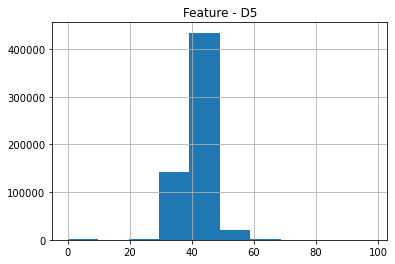

In [16]:
df_main1['D5'].hist()
plt.title('Feature - D5'); plt.show()

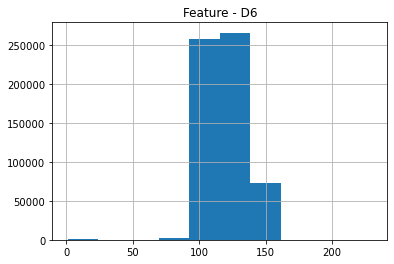

In [17]:
df_main1['D6'].hist()
plt.title('Feature - D6'); plt.show()

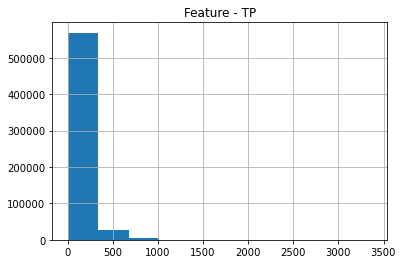

In [18]:
df_main1['TP'].hist()
plt.title('Feature - TP'); plt.show()

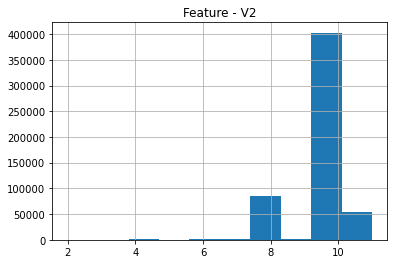

In [19]:
df_main1['V2'].hist()
plt.title('Feature - V2'); plt.show()

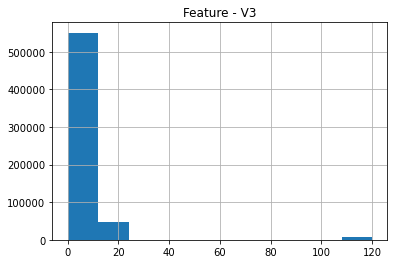

In [20]:
df_main1['V3'].hist()
plt.title('Feature - V3'); plt.show()

For all the above features plotted there is not much variation in the distribution. Hence simple methods of imputation are used for these features. (Median)

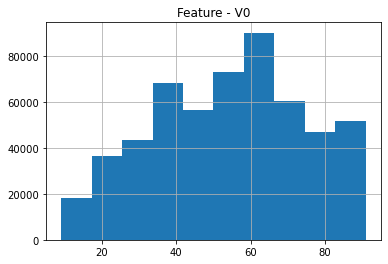

In [21]:
df_main1['V0'].hist()
plt.title('Feature - V0'); plt.show()

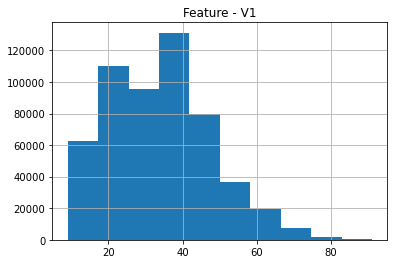

In [22]:
df_main1['V1'].hist()
plt.title('Feature - V1'); plt.show()

For features **"V0"** and **"V1"** the histograms plotted above show a higher amount of variation in the distribution. Also there are a huge number of NaNs present in these columns. Hence by using a single value substitution for the null values would result in inconsistent bias. Hence for these specific features we will use scikit-learn iterative imputer method.

**Median Imputer**

For the rest of the features, we will apply a simple median substitution for the null values, also using sklearn. The median value is chosen as it is not affected by outliers in the data.

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
# Columns with nulls present
columns_med = list(df_main1.columns)
# Removing categorical data in string format
columns_med.remove('PM1'); columns_med.remove('C1'); columns_med.remove('V8'); columns_med.remove('A0'); 
# Removing V1 and V0 so can perform iterative imputer later and current imputer method doesnt fill with median
columns_med.remove('V1'); columns_med.remove('V0')

In [25]:
# Defining the imputer method - Median
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
# Fitting
imp_med.fit(df_main1[columns_med])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [26]:
# Replacing all NaNs in the the data set with the correspodning column medium (Except V0 and V1)
df_main1[columns_med] = imp_med.transform(df_main1[columns_med])

**Iterative Imputer**

Below is implementing an iterative imputer for the V1/V2 features.

In [27]:
# First we must again seperate all the features that are not floats/integers etc...
num_features = list(df_main1.columns)
num_features.remove('PM1'); num_features.remove('C1'); num_features.remove('V8'); num_features.remove('A0')

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [30]:
# Run again if did not converge! The lack of convergence is due to methodology still in experimental stage.
imp = IterativeImputer(max_iter=300, random_state=0)
imp.fit(df_main1[num_features])

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=300, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [31]:
# Replacing all Null values in V0/V1 with iteratively regressed value
df_main1[num_features] = np.floor(imp.transform(df_main1[num_features]))

### A4 - Plotting Features

Below section is creating a scatter plot of all the Area features

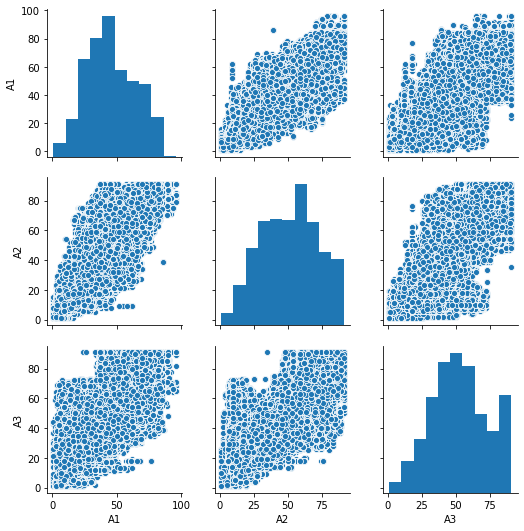

In [32]:
sns.pairplot(df_main1[['A1','A2','A3']])

From above scatter plots it can be seen there is a positive correlation between the features representing area. This means potentially the features are collinear.

### A5 - One Hot Label Encoding

For a machine to understand categorical data we must implement a label encoding regime that represents the values as number that is easily understood by machine. This label encoding is done on "PM1", "C1", "V8", "A0".

In [33]:
for i in ['PM1', 'C1', 'V8', 'A0']:
    # Using get_dummies to create data frame with label encoded information
    encoded_columns = pd.get_dummies(df_main1[i])
    # Now droping old column and attaching new columns to data
    df_main1 = df_main1.join(encoded_columns).drop(i, axis=1)

-----------------------------

# B - Predictive Model

A random forest regression model is used to predict the GWP values as it less complex and suitable for the tabular data provided. RFR is a safer option given time constraints.

The training data was split into training and test data so that model assements could be made. This does however sacrifice some data that could be used to train the model further.

In [34]:
# Shuffle data to avoid order bias
df_main1 = df_main1.sample(frac = 1) 

# Splitting data set into Target and Feature variables
Y = df_main1['GWP']
X = df_main1.drop(columns = 'GWP')

In [35]:
# Splitting the data sets into training and test sets (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Various number of n_estimator value were experimented and 100 was chosen. This is due to higher values being far to computationall expensive, leading to large run times and large amounts of memory used to store model.

The final model accuracy however does not change dramaticially with 100 estimators compared to 500.

In [36]:
%%time
# Below cell tkes <20mins to run

# Import the model
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
rf = RandomForestRegressor(n_estimators = 100)
# Fitting the model to the data
rf.fit(X_train, Y_train)

Wall time: 19min


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
# Predicting the results on the test data (20%) and saving to np.array
results = rf.predict(X_test)

### B1 Assesing Accuracy of Model

Plotting the first 100 values from test set and the predictions to visualise the results from our model. From the below plot we can see that there is clear correlation and that our prediction values are reasonably accurate.

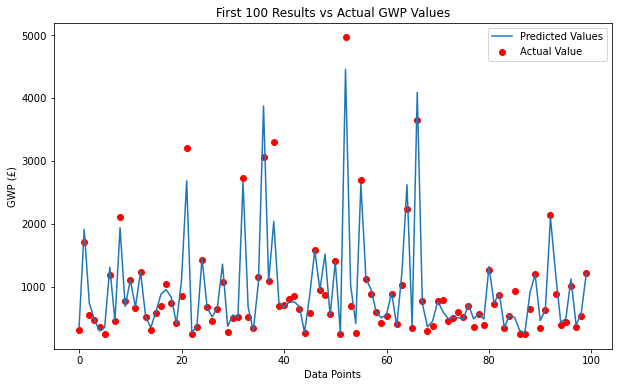

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(range(0,len(Y_test[:100])), Y_test[:100], color = 'red')
plt.plot(range(0,len(Y_test[:100])), results[:100])
plt.title('First 100 Results vs Actual GWP Values')
plt.xlabel('Data Points')
plt.ylabel('GWP (£)')
plt.legend(['Predicted Values','Actual Value'])

The following metric assess how well our model predicts the training targets Y_train. It bascially internally calculates
what our model would result in and compares against actual Y_train. This gives the internal accuracy of the model itself.

In [40]:
accuracy = rf.score(X_test,Y_test)
print("Accuracy: {}%".format(int(round(accuracy*100))))

Accuracy: 91%


**R Square**

The following metric assess the proportion of the variance in the data that has been explained by the variables in the model. Measures how well unseen samples are likely to be preidicted by the model. **Note** what is calculated is the unadjusted R^2 and does not take into consideration overfitting.

In [41]:
from sklearn.metrics import r2_score
R2 = r2_score(Y_test, results) 
print("R^2 Score: {}".format(R2))

R^2 Score: 0.9056051141150181


An R^2 score of 0.906 tells us that our model fits our variables accuratly

**Root Mean Absolute Error (RMAE)**

RMAE is an absolute measure of how good the fit is. Results in a number totalling the deviation of our results compared to actual. Lower results mean better!

In [42]:
from sklearn.metrics import mean_squared_error
print('RMAE Score - ', math.sqrt(mean_squared_error(Y_test, results)))

RMAE Score -  276.05548675541024


### B.2 Saving Model

In [43]:
from sklearn.externals import joblib
filename = 'Gilad_Amzaleg_RF_Model_ERS.sav'
joblib.dump(rf, filename)  

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Gilad_Amzaleg_RF_Model_ERS.sav']

# C - Test Data Sets

Before we use the model to predict for the two test data sets we must first transform the data into the same format as the test data set used from before.

**Test 1**

In [53]:
# Applying cleaning regime using function below MODEL_PREP - RUN TWICE
df_test1_clean = model_prep(df_test1)

In [54]:
# Predicting GWP for test data set
test1_results = rf.predict(df_test1_clean)

In [55]:
# Combining with QUOTEUID in a data frame to save as .csv
df_test1_results = pd.DataFrame(data = {'QUOTEUUID' : df_test1['QUOTEUUID'],
                                        'Predicted GWP' : test1_results})

In [56]:
# Saving to .csv file
df_test1_results.to_csv('Test1_Results_GiladAmzaleg.csv')

**Test 2**

In [57]:
# Applying cleaning regime using function below MODEL_PREP - RUN TWICE
df_test2_clean = model_prep(df_test2)

In [58]:
# Predicting GWP for test data set
test2_results = rf.predict(df_test2_clean)

In [59]:
# Combining with QUOTEUID in a data frame to save as .csv
df_test2_results = pd.DataFrame(data = {'QUOTEUUID' : df_test2['QUOTEUUID'],
                                        'Predicted GWP' : test2_results})

In [60]:
# Saving to .csv file
df_test2_results.to_csv('Test2_Results_GiladAmzaleg.csv')

# D - Feature Analysis

In [61]:
# Appending the prediction results onto the dataframs containing the test data
df_test1['Predicted GWP'] = test1_results
df_test2['Predicted GWP'] = test2_results

**Violin Plot Investigating V8 (Parking Type)**

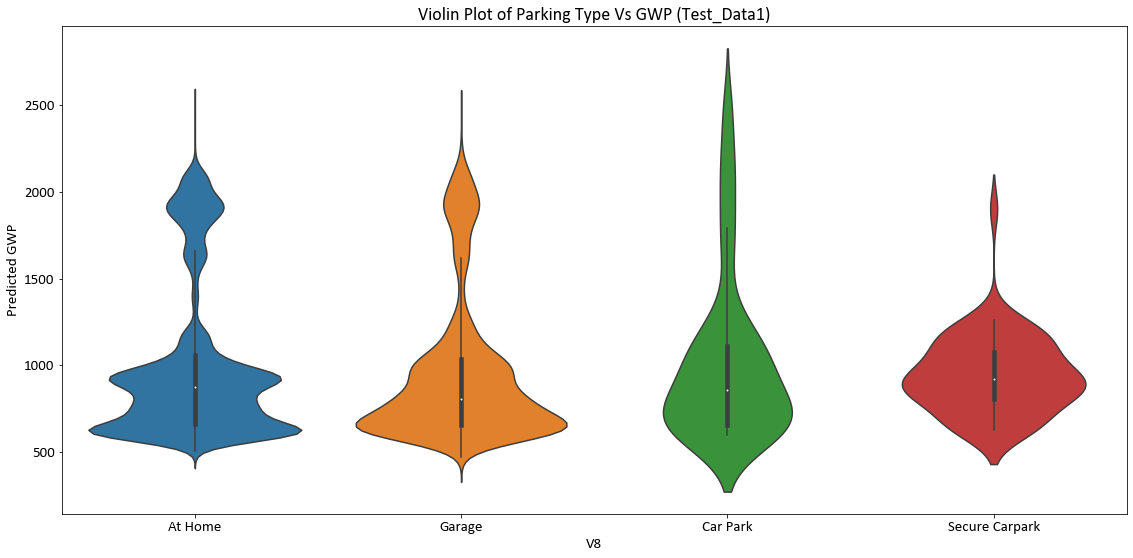

In [62]:
# Set font parameters
plt.rcParams['svg.fonttype'] = 'none'; plt.rcParams['font.family'] = 'sans-serif'; 
plt.rcParams['font.sans-serif'] = 'Calibri'; plt.rcParams['font.size'] = 15.0

fig = plt.figure(figsize=(16, 8)); 
ax = sns.violinplot(x="V8", y="Predicted GWP", data=df_test1[['V8','Predicted GWP']])
ax.set(title = 'Violin Plot of Parking Type Vs GWP (Test_Data1)')

fig.tight_layout()  # so nothing clipped
plt.show()

The above plot shows the muxture of probability and denisty for each V8 category against predicted GWP. 

Initially it can be seen that the "At Home" category is bimodel which means it has two distinct maxima. This tells us that there are two different clusters of GWP values for the category. For the "At Home" category this could potentially indicate whether a person keeps their car on the **street** or in a **driveway** and the written GWP varies accordingly.

From the above figure, it can be seen that a "Secure Carpark" has a much smaller 1st and 3rd quartile and smaller upper adjecent value compared to the rest. It also has a much tighter spread of values accross the Predicted GWP axis. This may indicate that the insurance provider is much more confident in providing a GWP for cars in a secure carpark over the rest. This makes sense and there is less probability of damage or theft. 

**Average GWP Value Compared to Area**

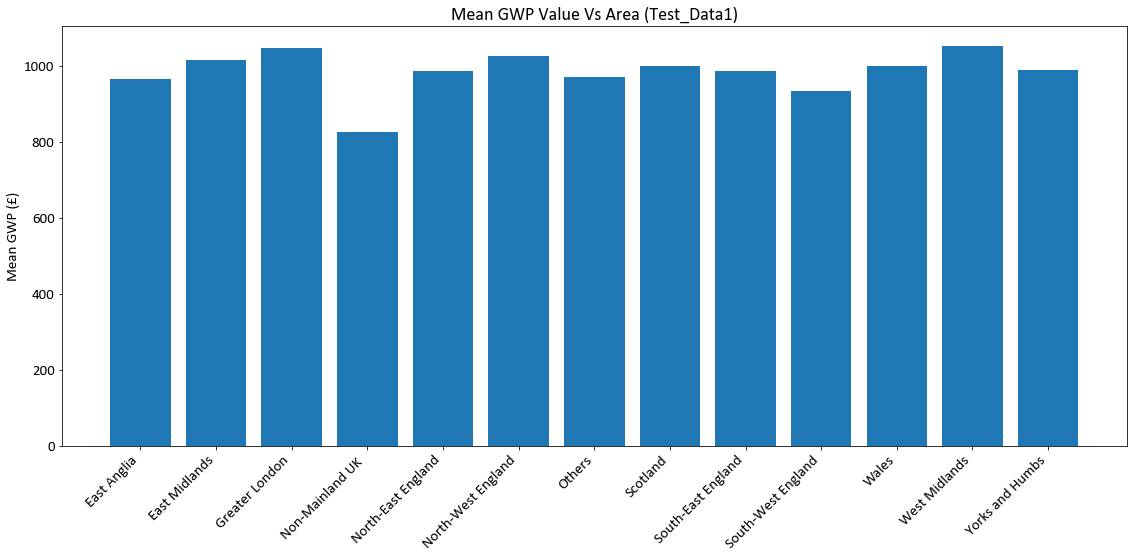

In [66]:
# Set font parameters
plt.rcParams['svg.fonttype'] = 'none'; plt.rcParams['font.family'] = 'sans-serif'; 
plt.rcParams['font.sans-serif'] = 'Calibri'; plt.rcParams['font.size'] = 15.0

fig = plt.figure(figsize=(16, 8)); 
plt.bar(df_test1.groupby('A0').mean()['Predicted GWP'].index,df_test1.groupby('A0').mean()['Predicted GWP'])
plt.title('Mean GWP Value Vs Area (Test_Data1)')
plt.ylabel('Mean GWP (£)')
fig.autofmt_xdate(rotation= 45)

fig.tight_layout()  # so nothing clipped
plt.show()

From the above plot it can be seen that "Non-Mainland UK" areas have the lowest average GWP written and North-West England the highest. 

**Correlation Coefficient**

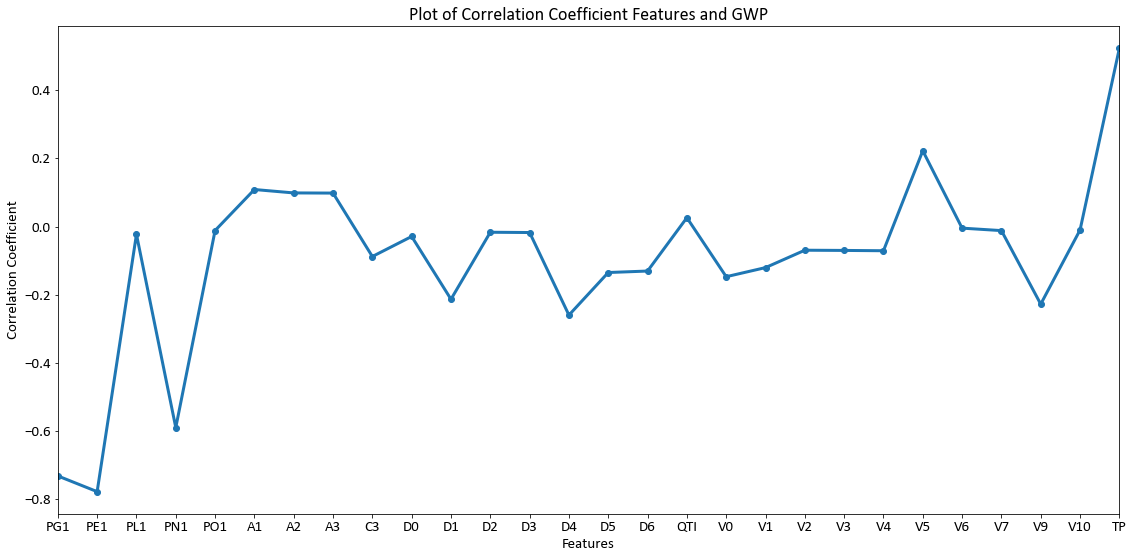

In [68]:
# Set font parameters
plt.rcParams['svg.fonttype'] = 'none'; plt.rcParams['font.family'] = 'sans-serif'; 
plt.rcParams['font.sans-serif'] = 'Calibri'; plt.rcParams['font.size'] = 15.0

fig = plt.figure(figsize=(16, 8));
plt.plot(df_test1.corr()['Predicted GWP'].drop('Predicted GWP'), 'o-', linewidth=3)
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Plot of Correlation Coefficient Features and GWP')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
fig.tight_layout()  # so nothing clipped
plt.show()

The correlation coefficient is a measure of how correlated two variables are. Above is a plot of the correlation coefficient calculated for each feature compared to the predicited GWP value. 1 = Positive Correlation, 0 = No Correlation and -1 = Negative Correlation.

From the above graph it can be seen the "TP" has the highest positive correlation with "GWP" from all the features. This means that usually high values of TP indicate a high value of GWP.

Conversly "PG1", "PE1" and "PN1" have large negative values indiciate negative correlation. 

It is also worth noting that there are most of the values are centred around zero, however that does not indicate that they are bad features to predict GWP. Even though there is little correlation between the individual features and the target variable, the ensemble of features can be used effectively to predict GWP.

In [69]:
def model_prep(df):
    '''Function takes in a test data set and applys the same cleaning/preperation regime created for the training data set.
    It first removes all the irrelevant columns, then applies an imputation process for specific columns in "columns_med_test".
    This list of values is found from dataframe.
    
    Then applies itterative imputation process to remaining features (V0 and V1) that were deemend to be too sparse to simply
    replace with median value.
    
    INPUTS - DataFrame containing test features
    
    OUTPUTS - Original data frame but prepped for prediction.
    
    
    '''
    
    # Dropping irrelevant columns to do with Time
    df = df.drop(columns = ['QUOTEUUID', 'QUOTEDATE', 'APC', 'C2'])
    
    # Creatig a list of features we want to apply median imputation to. Everyone column except catergorical and V0/V1
    columns_med_test = list(df.columns)
    # Removing categorical data in string format
    columns_med_test.remove('PM1'); columns_med_test.remove('C1'); columns_med_test.remove('V8'); columns_med_test.remove('A0'); 
    # Removing V1 and V0 so can perform iterative imputer
    columns_med_test.remove('V1'); columns_med_test.remove('V0');
    
    ################ Median Imputer ######################
    # Defining the imputer method - Median
    imp_med_test = SimpleImputer(missing_values=np.nan, strategy='median')
    # Fitting
    imp_med_test.fit(df[columns_med_test])
    
    # Median Imputer - Replacing all NaNs in the the data set with the correspodning column medium
    df[columns_med_test] = imp_med_test.transform(df[columns_med_test])
    
    
    ################ Iterative Imputer ######################
    num_features_test = columns_med_test + ['V0','V1']
    
    # Defining imputer method
    imp_test = IterativeImputer(max_iter=300, random_state=0)
    imp_test.fit(df[num_features_test])
    # Apllying transform on V0/V1 Features
    df[num_features_test] = np.floor(imp_test.transform(df[num_features_test]))
    
    # One Hot Label Encoding
    for i in ['PM1', 'C1', 'V8', 'A0']:
        # Using get_dummies to create data frame with label encoded information
        encoded_columns = pd.get_dummies(df[i])
        # Now droping old column and attaching new columns to data
        df = df.join(encoded_columns).drop(i, axis=1)
        
    return(df)